In [2]:
log = open("/Users/shawnmeier/Documents/source/bounder/soot_hopper/log/logging.log_connectbot_2hr_withbackfilter",'r')
loglines = log.readlines()
log.close()

#get index of recent run
startInd = 0
lastRunStart = 0
for line in loglines:
    if "Starting experiments run" in line:
        lastRunStart = startInd
    startInd += 1

expLines = loglines[lastRunStart:]
rowtimes = [line for line in loglines if "Row" in line and "time(ms)" in line]
for rowtime in rowtimes:
    spl = rowtime.split(":")
    print("%s %f" % (spl[-2], float(spl[-1])/1000000))

371 - Row 1 withUnsub time(ms) 13.885837
371 - Row 1 noUnsub time(ms) 10.261788
467 - Row 2 disable time(ms) 44.722055
467 - Row 2 noDisable time(ms) 16.192792
662 - Row 5 withCheck time(ms) 1075.191361
662 - Row 5 noCheck time(ms) 26.945109
755 - Row 4 Witnessed time(ms) 427.172779
755 - Row 4 Timeout time(ms) 7293.246240


In [6]:
import matplotlib.pyplot as plt
def parseTime(s):
    return float(s.split(":")[-1].strip())/1000000
feasibility_times = [parseTime(line) for line in loglines if "feasibility " in line]
#subsumption time

subsumption_times_true = [parseTime(line) for line in loglines if "subsumption " in line and "result:true" in line]
subsumption_times_false = [parseTime(line) for line in loglines if "subsumption " in line and "result:false" in line]
print("feasibility lines: %i" % len(feasibility_times))
print("subsumption lines: %i" % len(subsumption_times))

feasibility lines: 14033
subsumption lines: 1879


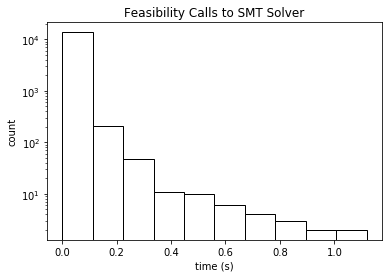

In [7]:
plt.hist(feasibility_times, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Feasibility Calls to SMT Solver')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/feas_time.png")
plt.show()

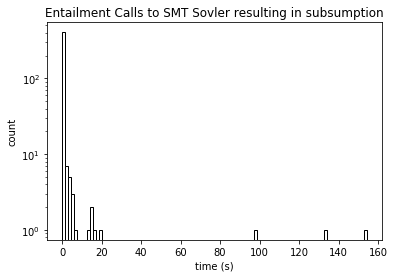

In [8]:
plt.hist(subsumption_times_true, bins=100, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Entailment Calls to SMT Sovler resulting in subsumption')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time.png")
plt.show()

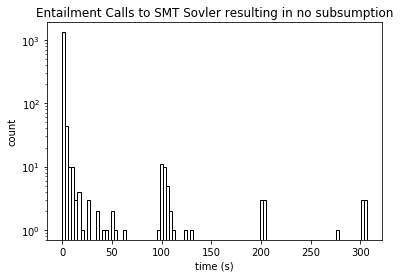

In [9]:
plt.hist(subsumption_times_false, bins=100, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Entailment Calls to SMT Sovler resulting in no subsumption')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time.png")
plt.show()